In [ ]:
uploaded = files.upload()

Saving knn-train.txt to knn-train.txt
Saving knn-test.txt to knn-test.txt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def nearestmeans(k, testdata, traindata, testcat, traincat):

  reward = 0
  count = 0
  for i in testdata:
    distances = []
    i = np.array(i)
    for j in range(len(traindata)):
      x = []
      x.append(np.linalg.norm(i - traindata[j]))
      x.append(traincat[j])
      distances.append(x)

    distances.sort()
    cat1 = 0
    cat2 = 0
    for i in range(k):
      if(distances[i][1] == 1):
        cat1 +=1 
      else:
        cat2 +=1
    x = 2
    if(cat1>cat2):
      x = 1
    elif(cat2>cat1):
      x = -1
    else:
      t = np.random.uniform(0,100)
      if (t<50):
        x = 1
      else:
         x = -1

    if(x == testcat[count]):
      reward +=1
  
    count+=1
  return reward

In [ ]:
Xlist = []
traincat = []
f = open('knn-train.txt', 'r')
for r in f:
  arr = r.split()
  arr1 = []
  arr1.append(float(arr[0])) 
  arr1.append(float(arr[1])) 
  traincat.append(float(arr[2]))
  Xlist.append(arr1)

X = np.array(Xlist)

testlist = []
testcat = []
with open('knn-test.txt', 'r') as file:
    for r in file:
      arr1 = r.split()
      arr = []
      arr.append(float(arr1[0])) 
      arr.append(float(arr1[1])) 
      testcat.append(float(arr1[2]))
      testlist.append(arr)

test = np.array(testlist)


rewards = []
kvals = []
for k in range(1,100):
  t = nearestmeans(k, test, X, testcat, traincat)
  rewards.append(t/200)
  kvals.append(k)

Text(0, 0.5, 'Value of accuracy(k)')

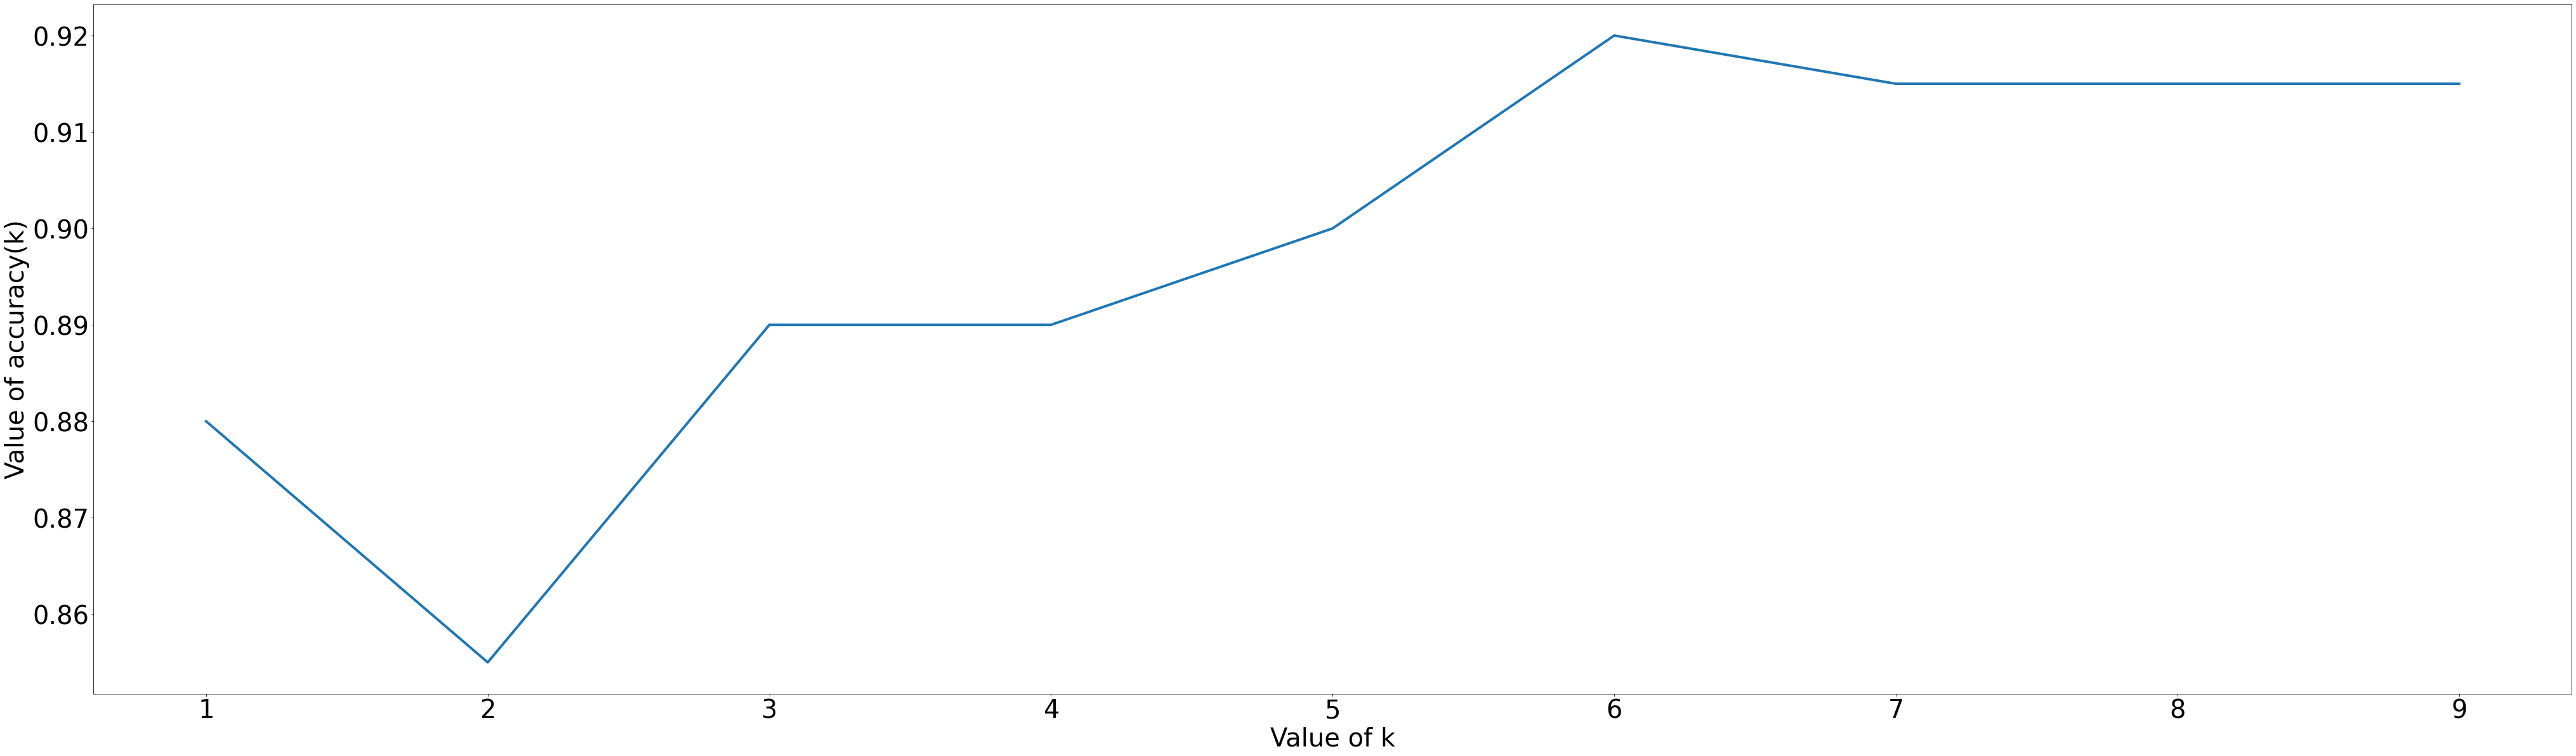

In [ ]:
plt.plot(kvals,rewards, linewidth = 4)
plt.xlabel("Value of k")
plt.ylabel("Value of accuracy(k)")

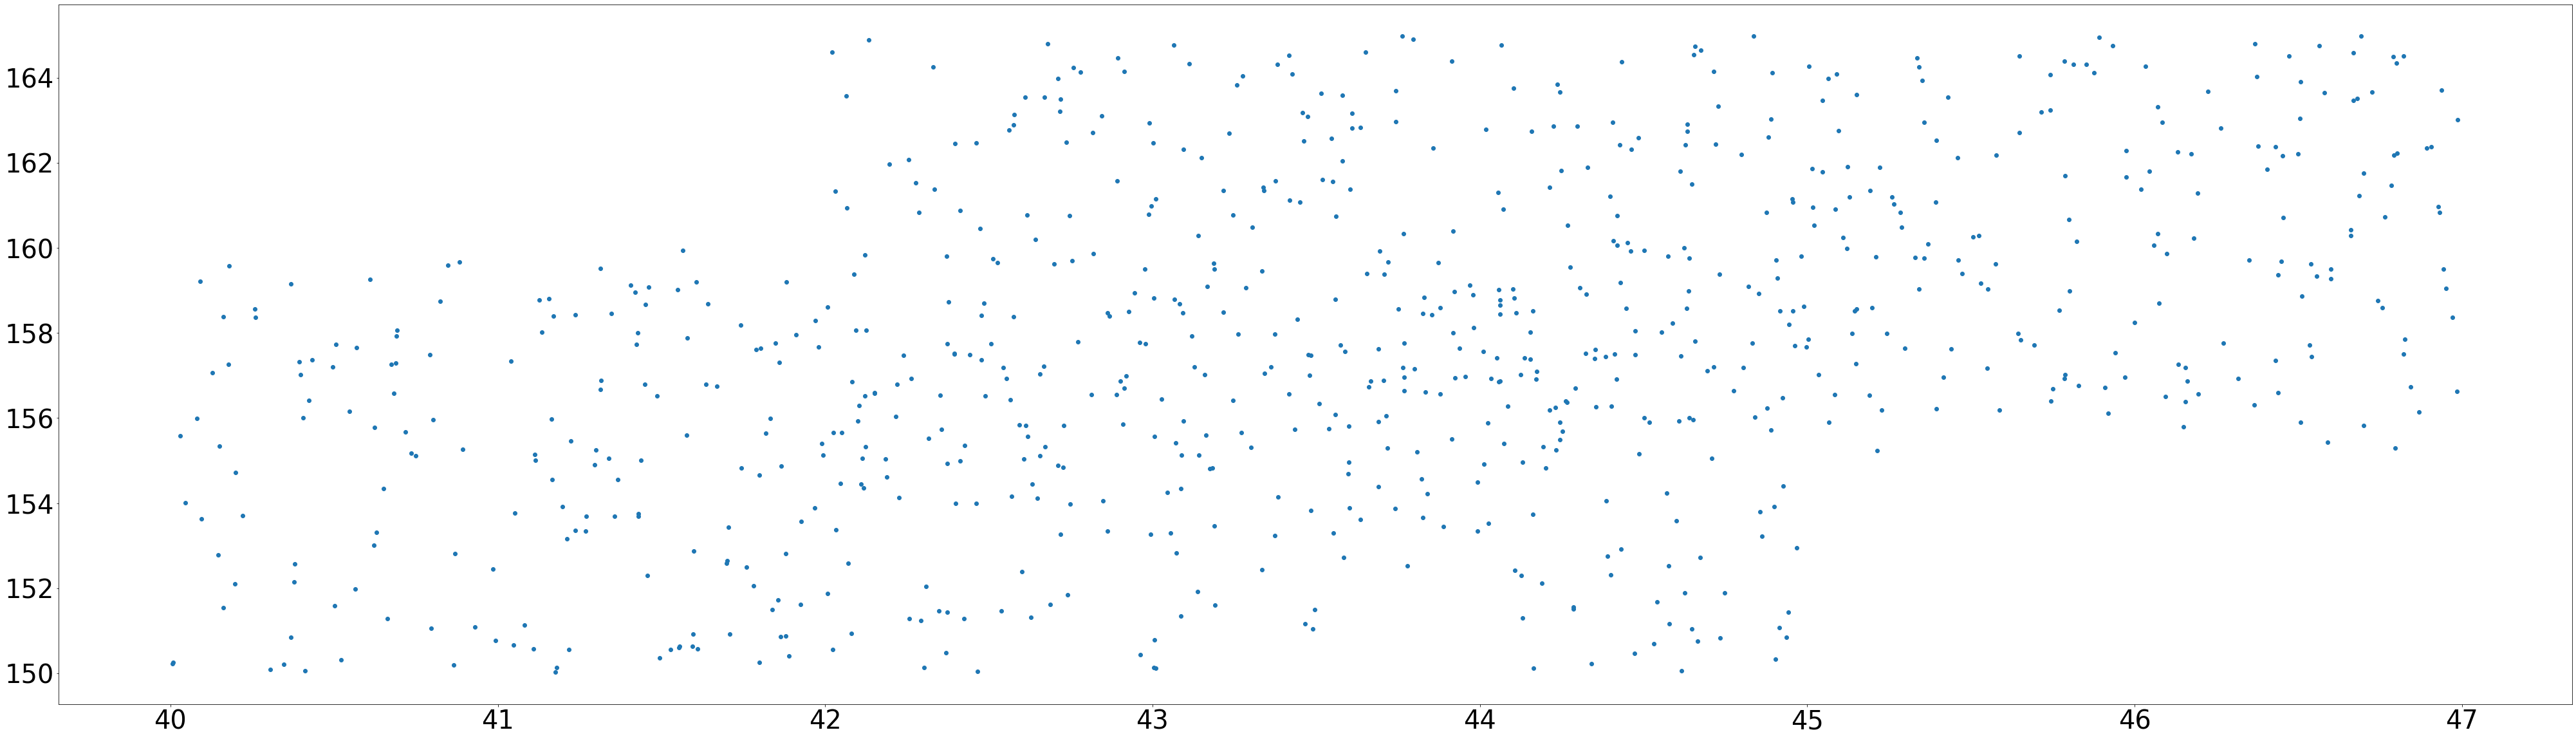

In [ ]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["font.size"] = 40
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
def perceptron(pertrain, pertraincat):

  n = len(pertrain)
  # w = np.array([math.sqrt(2)/2,math.sqrt(2)/2])
  # w = np.array([1,0])
  w = np.array([0,1])
  icount = 0

  count = 0
  while(count<n):
    count = 0
    for i in range(n):
      x = np.dot(w, pertrain[i])
      # print(x, pertraincat[i])
      if(pertraincat[i]*x>0):
        count+=1
        continue;

      w = w + pertraincat[i]*pertrain[i]
      break

    # print(count)
    icount+=1
  return w,icount


In [ ]:
def findaccuracy(w, pertest, pertestcat):
  
  reward = 0
  for i in range(len(pertest)):
    x = np.dot(w, pertest[i])

    if(x<0):
      cat = -1

    else:
      cat = 1 
    
    if(cat == pertestcat[i]):
      reward+=1
  return reward/len(pertest)

In [ ]:
def findgamma(w, traindata, traincat):
  gamma = traincat[0]*np.dot(w, traindata[0])
  for i in range(len(traindata)):
    if(traincat[i]*np.dot(w, traindata[i])<gamma):
      gamma = traincat[i]*np.dot(w, traindata[i]) 
  
  return gamma/np.linalg.norm(w)


In [ ]:
def findR(X):
  r = 0
  origin = [int(0) for i in range(len(X[0]))]
  for i in X:
    x = np.linalg.norm(i - np.array(origin))
    if(x>r):
      r = x 
  return r

In [ ]:
pertrainlist = []
pertraincat = []
f = open('perceptron-train.txt', 'r')
for r in f:
  arr = r.split()
  arr1 = []
  arr1.append(float(arr[0])) 
  arr1.append(float(arr[1])) 
  pertraincat.append(float(arr[2]))
  pertrainlist.append(arr1)

pertrain = np.array(pertrainlist)

pertestlist = []
pertestcat = []
with open('perceptron-test.txt', 'r') as file:
    for r in file:
      arr1 = r.split()
      arr = []
      arr.append(float(arr1[0])) 
      arr.append(float(arr1[1])) 
      pertestcat.append(float(arr1[2]))
      pertestlist.append(arr)

pertest = np.array(pertestlist)
w,icount = perceptron(pertrain, pertraincat)
print(icount)


10992


In [ ]:
findgamma(w, pertrain, pertraincat)

0.016598304923929733

In [ ]:
findaccuracy(w,pertest,pertestcat)

1.0

In [ ]:
findR(pertrain)

27223.171659915588

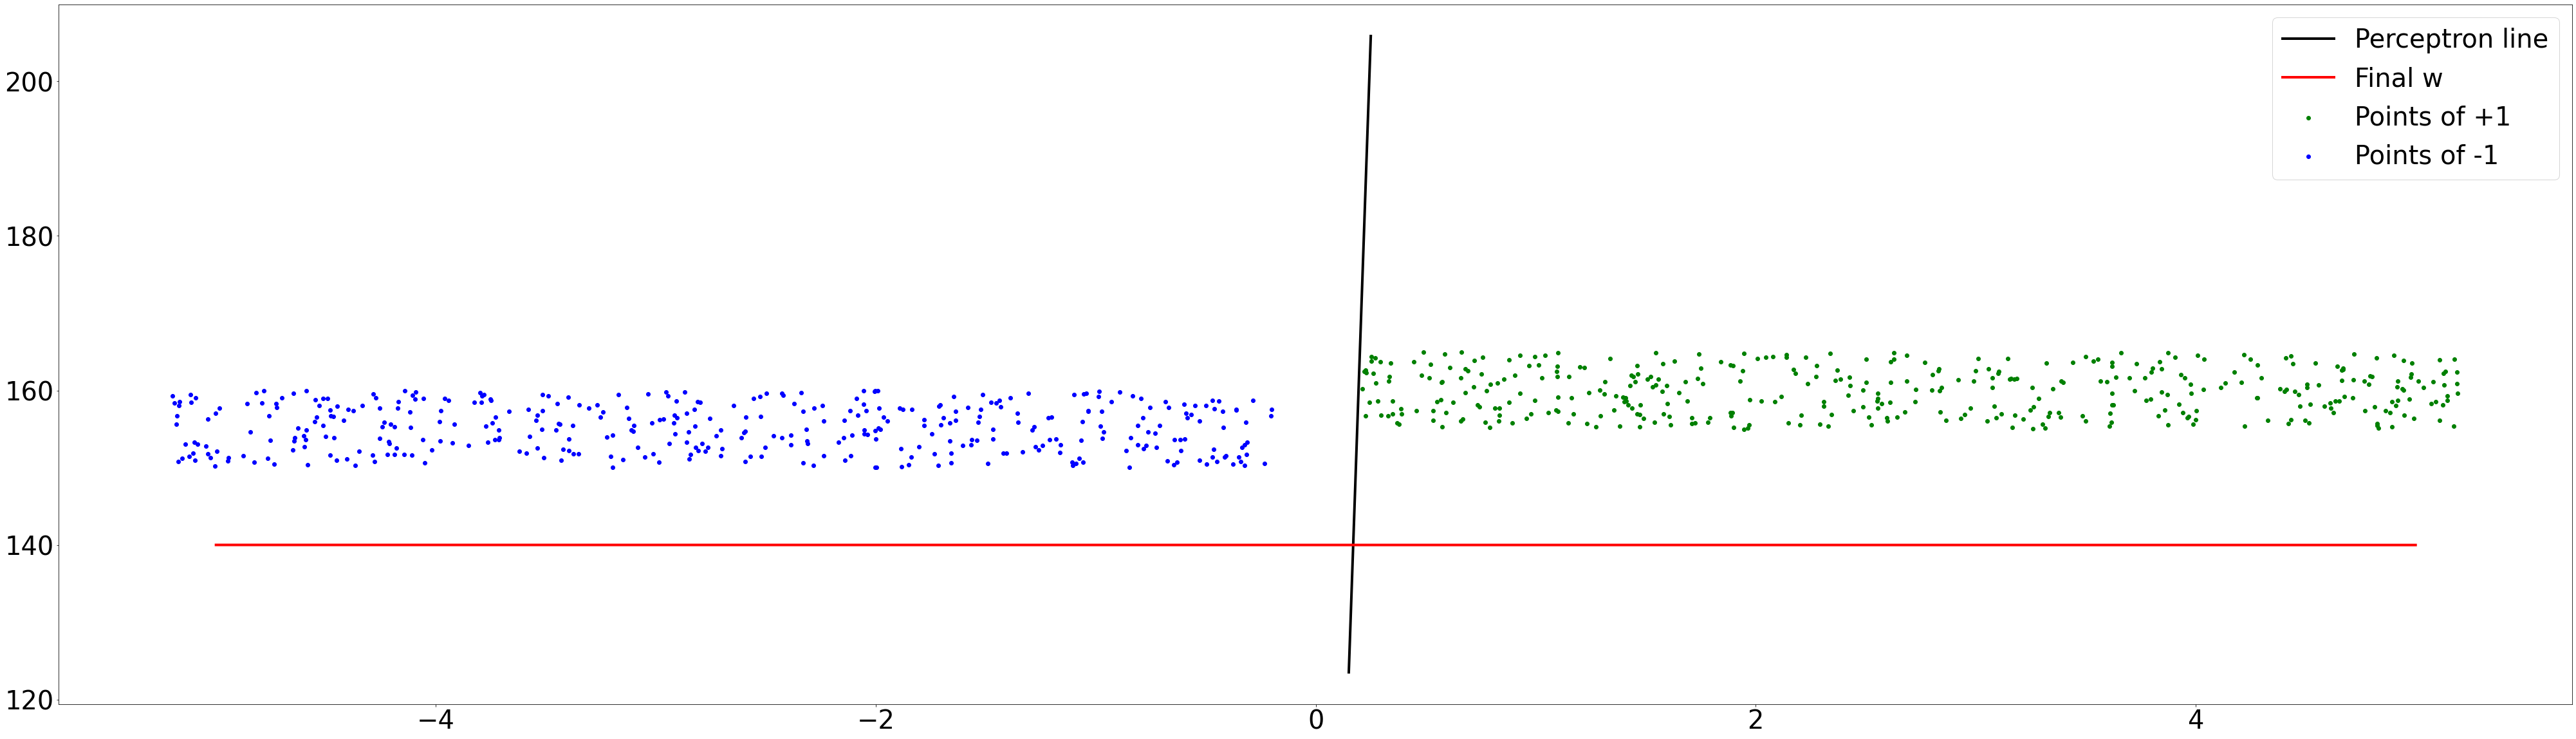

In [ ]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["font.size"] = 40
x1 = []
x2 = []
for i in range(len(pertraincat)):
  if(pertraincat[i] == 1):
    x1.append(pertrain[i])
  else:
    x2.append(pertrain[i])
x1 = np.array(x1)
x2 = np.array(x2)
plt.scatter(x1[:,0], x1[:,1], c = "green", label = "Points of +1")
plt.scatter(x2[:,0], x2[:,1], c = "blue", label = "Points of -1")

x = np.linspace(0.15,0.25,1000)

# line would be wTx = 0
# in other words w[0]*x + w[1]*y = 0
# or y = -w[0]/w[1]
plt.plot(x,(-1)*w[0]/w[1]*x, 'k', linewidth = 4, label ="Perceptron line")
#perpendicular w[1]/w[0]
x1 = np.linspace(-5, 5, 1000)
plt.plot(x1, w[1]/w[0]*x1+140, 'r', linewidth = 4, label = "Final w")

plt.legend()


In [ ]:
def bperceptron(bpertrain, bpertraincat):
  n = len(bpertrain)
  # w = np.array([math.sqrt(2)/2,math.sqrt(2)/2])
  # w = np.array([1,0])
  w = np.array([1,0,0])
  icount = 0

  count = 0
  while(count<n):
    count = 0
    for i in range(n):
      x = np.dot(w, bpertrain[i])
      # print(x, pertraincat[i])
      if(bpertraincat[i]*x>0):
        count+=1
        continue;

      w = w + bpertraincat[i]*bpertrain[i]
      break

    icount+=1
  return w,icount


In [ ]:
bpertrainlist = []
bpertraincat = []
f = open('perceptron-biased-train.txt', 'r')
for r in f:
  arr = r.split()
  arr1 = []
  arr1.append(float(arr[0])) 
  arr1.append(float(arr[1])) 
  arr1.append(1)
  bpertraincat.append(float(arr[2]))
  bpertrainlist.append(arr1)

bpertrain = np.array(bpertrainlist)

bpertestlist = []
bpertestcat = []
with open('perceptron-biased-test.txt', 'r') as file:
    for r in file:
      arr1 = r.split()
      arr = []
      arr.append(float(arr1[0])) 
      arr.append(float(arr1[1])) 
      arr.append(float(1))
      bpertestcat.append(float(arr1[2]))
      bpertestlist.append(arr)

bpertest = np.array(bpertestlist)
wb, icount = bperceptron(bpertrain, bpertraincat)

In [ ]:
findaccuracy(wb, bpertest, bpertestcat)

1.0

In [ ]:
findgamma(wb,bpertrain, bpertraincat)

1.0213829672970056e-05

In [ ]:
findR(bpertrain)

NameError: ignored

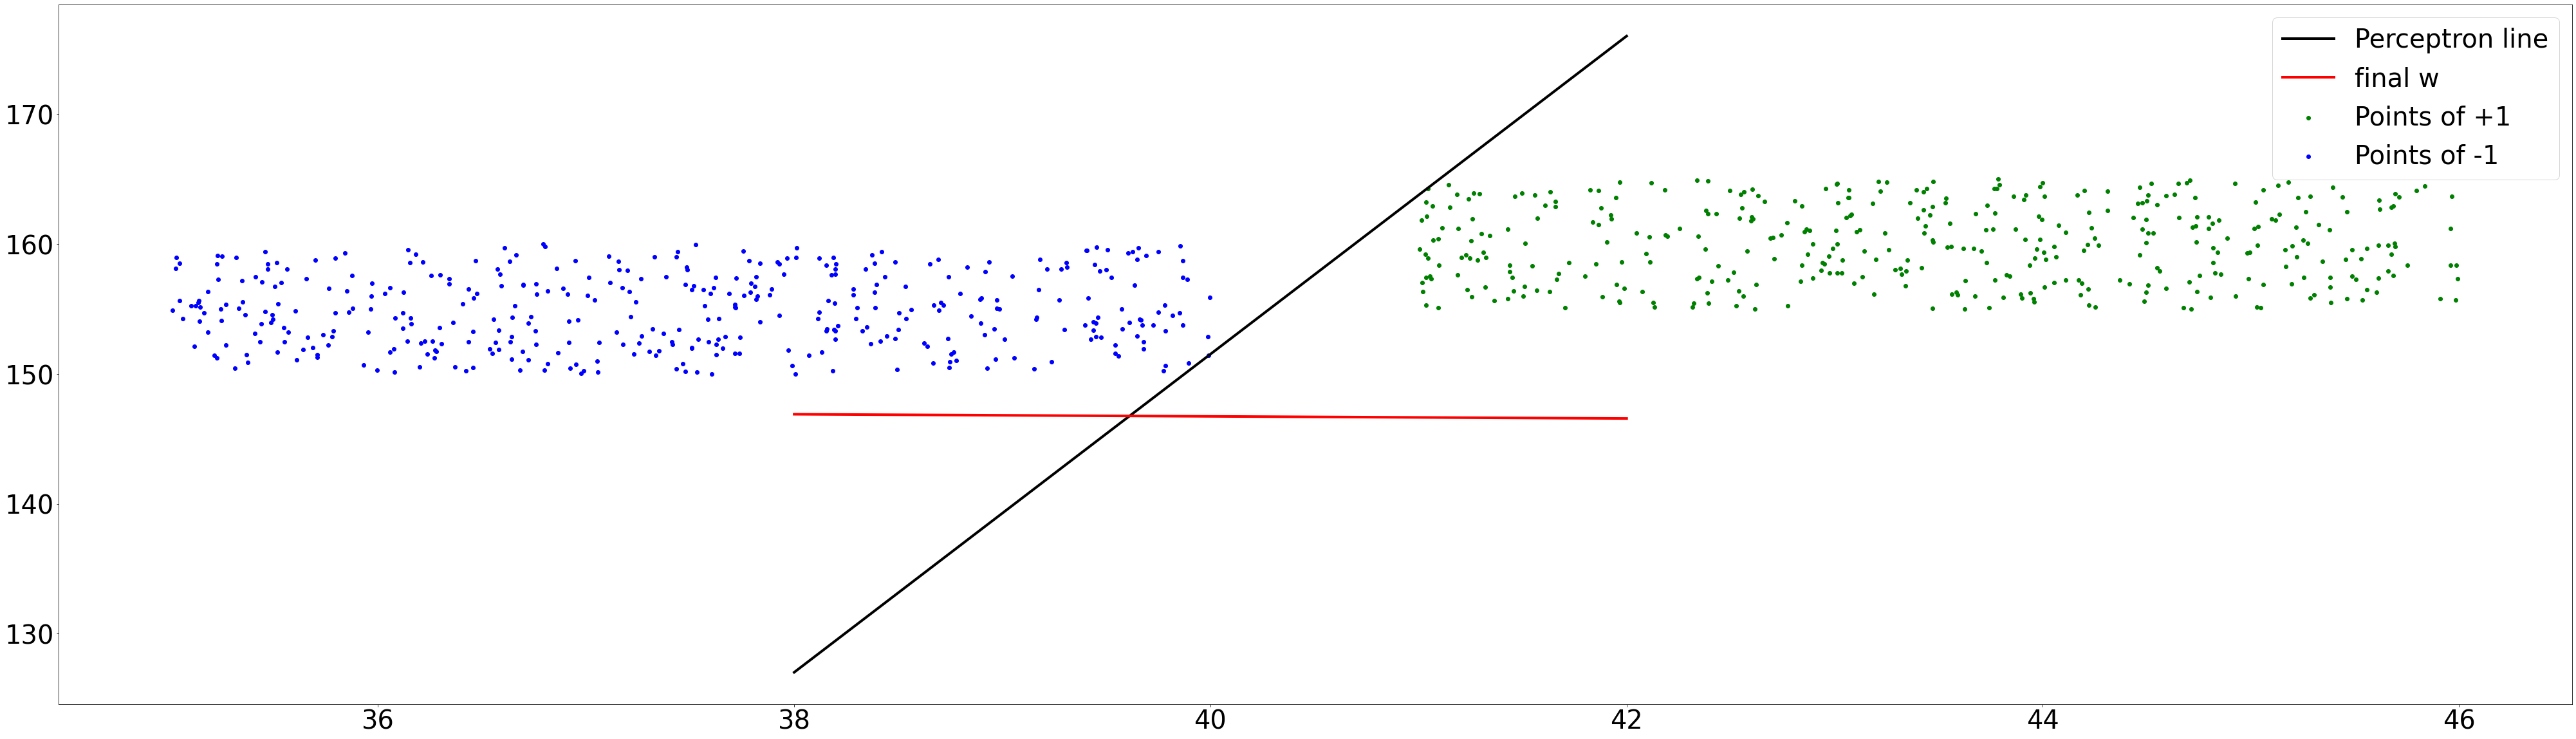

In [ ]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["font.size"] = 40
x1 = []
x2 = []
for i in range(len(pertraincat)):
  if(bpertraincat[i] == 1):
    x1.append(bpertrain[i])
  else:
    x2.append(bpertrain[i])
x1 = np.array(x1)
x2 = np.array(x2)
plt.scatter(x1[:,0], x1[:,1], c = "green", label = "Points of +1")
plt.scatter(x2[:,0], x2[:,1], c = "blue", label = "Points of -1")

x1 = np.linspace(38, 42, 1000)

# line should be wTx = 0, in other words
# w[0]*x + w[1]*y + w[2] = 0
# or y = -w[0]/w[1]x - w[2]/w[1]
plt.plot(x1, -1*wb[0]/wb[1]*x1 - wb[2]/wb[1], 'k', linewidth = 4, label ="Perceptron line")

#the perceptron line(w) is simply perpendicular to this line
x = np.linspace(38,42,1000)

# raising the line by 150
plt.plot(x,wb[1]/wb[0]*x+150, 'r', linewidth = 4, label = "final w")
plt.legend()
plt.show()